In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## <font color="#FF9900">Запускать нужно два раза подряд</font> (графики не меняют размер после первого)

In [16]:
# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
from time import sleep

plt.rcParams.update({
  'font.size': 15, 
  'figure.figsize' : [21, 10],
  'lines.linewidth' : 2,
  })


In [17]:
titles = ['text-size',	'pat-size',	'time',	'comparisons']


In [18]:
df = pd.DataFrame(columns=titles)
display(df)


,text-size,pat-size,time,comparisons


### Считывание и функции для отрисовки


In [19]:
array_nums = ['10000', '100000']
array_text_types = ['binary', 'quad']
array_pattern_types = ['simple', 'advance']
array_func_names = ['slow', 'kmp1', 'kmp2', 'bm']


map_algos = {}

# Разделяем по размеру
map_1 = {}
map_2 = {}

map_algos[array_nums[0]] = map_1
map_algos[array_nums[1]] = map_2

# Разделяем размеры на варианты генерации текста
map_binary_1 = {}
map_quad_1 = {}

map_binary_2 = {}
map_quad_2 = {}

map_1[array_text_types[0]] = map_binary_1
map_1[array_text_types[1]] = map_quad_1

map_2[array_text_types[0]] = map_binary_2
map_2[array_text_types[1]] = map_quad_2

# Разделяем размеры с вариантами генерации текста на варианты генерации паттерна
list_binary_simple_1 = []
list_binary_advance_1 = []
list_binary_simple_2 = []
list_binary_advance_2 = []

list_quad_simple_1 = []
list_quad_advance_1 = []
list_quad_simple_2 = []
list_quad_advance_2 = []

map_binary_1[array_pattern_types[0]] = list_binary_simple_1
map_binary_1[array_pattern_types[1]] = list_binary_advance_1

map_binary_2[array_pattern_types[0]] = list_binary_simple_2
map_binary_2[array_pattern_types[1]] = list_binary_advance_2


map_quad_1[array_pattern_types[0]] = list_quad_simple_1
map_quad_1[array_pattern_types[1]] = list_quad_advance_1

map_quad_2[array_pattern_types[0]] = list_quad_simple_2
map_quad_2[array_pattern_types[1]] = list_quad_advance_2


# Собираем все результаты в листы по алгоритмам
for num in array_nums:
    for text_type in array_text_types:
      for pattern_type in array_pattern_types:
          for name in array_func_names:
              map_algos[num][text_type][pattern_type].append(pd.read_csv(
                  f'tests/size{num}/{name}_{text_type}_{pattern_type}_{num}.csv', sep=';'))

# map_algos


In [20]:
def plotTestsTimeComps(num: str, text_type: str, pattern_type: str):
  fig, axs = plt.subplots(nrows= 1 , ncols= 2)
  fig.suptitle(f'All algorithms; Text size is <{num}>, Text type is <{text_type}>, Pattern type is <{pattern_type}>')

  i = 0
  param = 'time'
  for item in map_algos[num][text_type][pattern_type]:
    item.plot(ax=axs[0], x='pat-size', y=param, xlabel='pattern size', ylabel='microseconds',
                  title=f'Graphs with algorithm {param}', label=array_func_names[i])
    i += 1
  axs[0].legend()

  i = 0
  param = 'comparisons'
  for item in map_algos[num][text_type][pattern_type]:
    item.plot(ax=axs[1], x='pat-size', y=param, xlabel='pattern size', ylabel='comparisons',
                  title=f'Graphs with algorithm {param}', label=array_func_names[i])
    i += 1
  axs[1].legend()
  plt.show()

### <font color="#60BBD0">Все алгоритмы</font>


##### Size - 10000; Text - Binary; Pattern - Simple


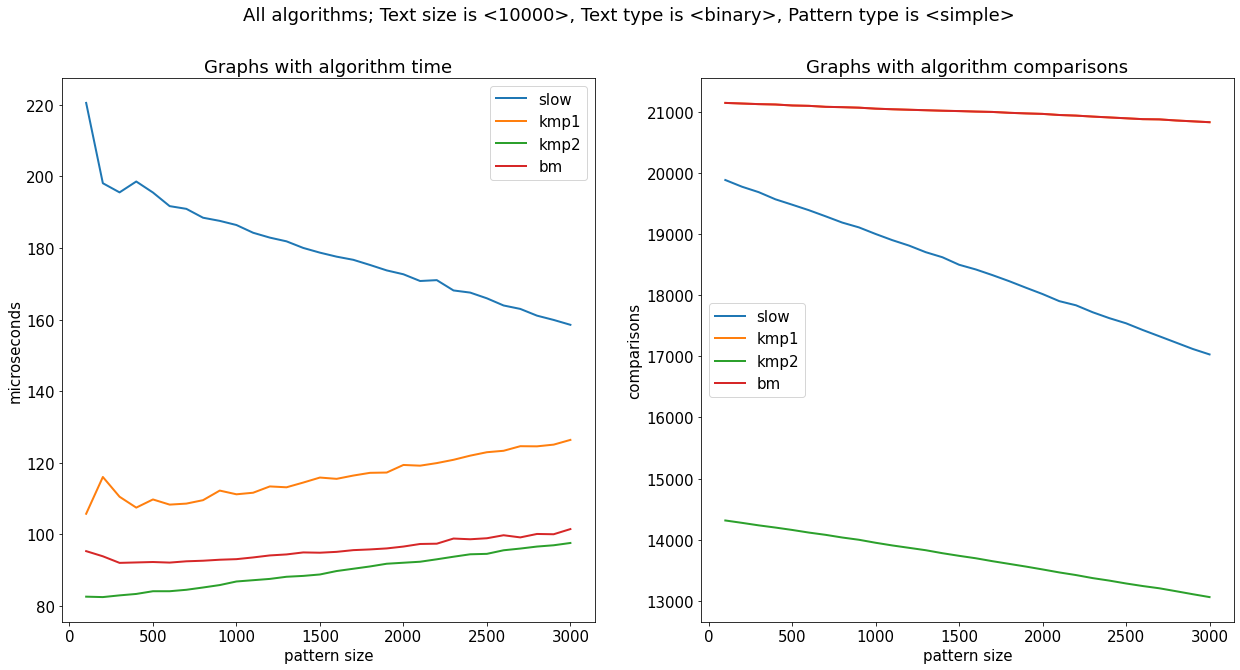

In [21]:
plotTestsTimeComps('10000', 'binary', 'simple')


##### Size - 10000; Text - Quad; Pattern - Simple


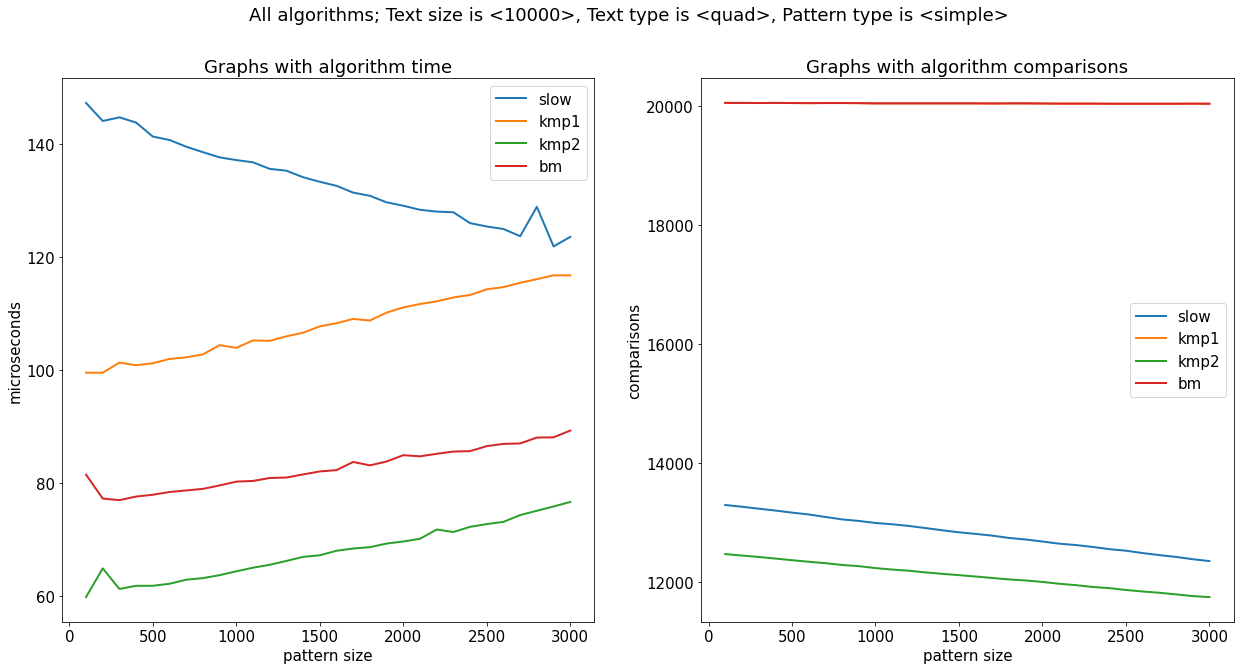

In [22]:
plotTestsTimeComps('10000', 'quad', 'simple')


##### Size - 100000; Text - Binary; Pattern - Simple


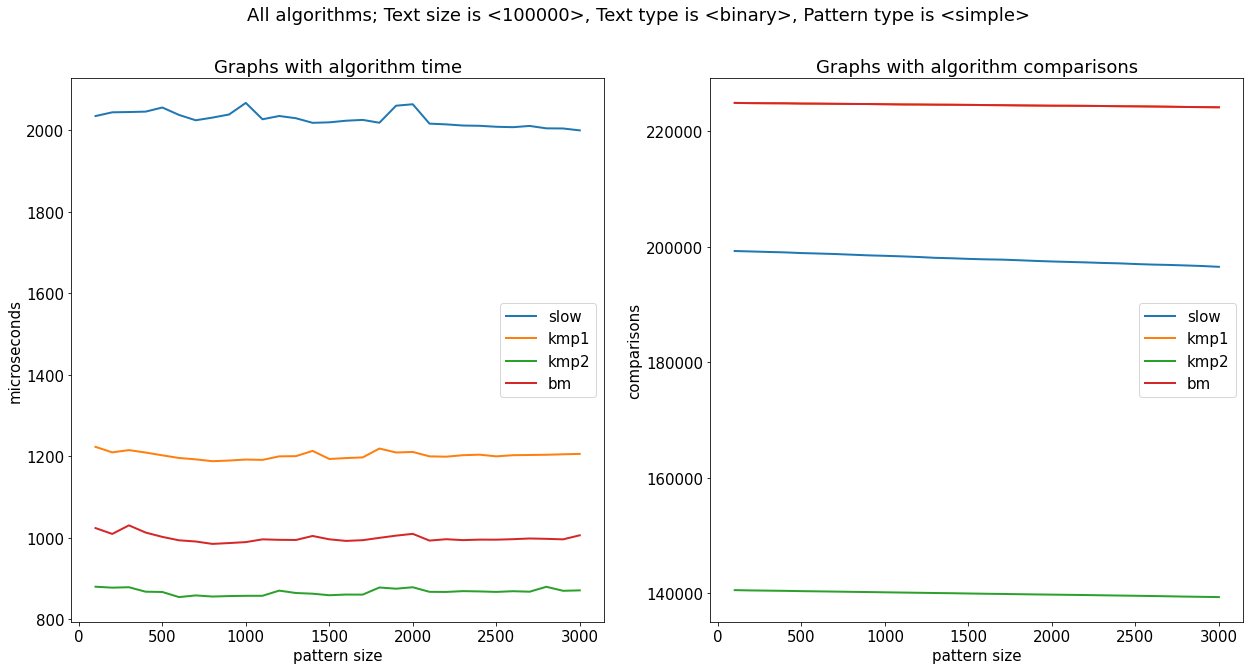

In [23]:
plotTestsTimeComps('100000', 'binary', 'simple')


##### Size - 100000; Text - Quad; Pattern - Simple


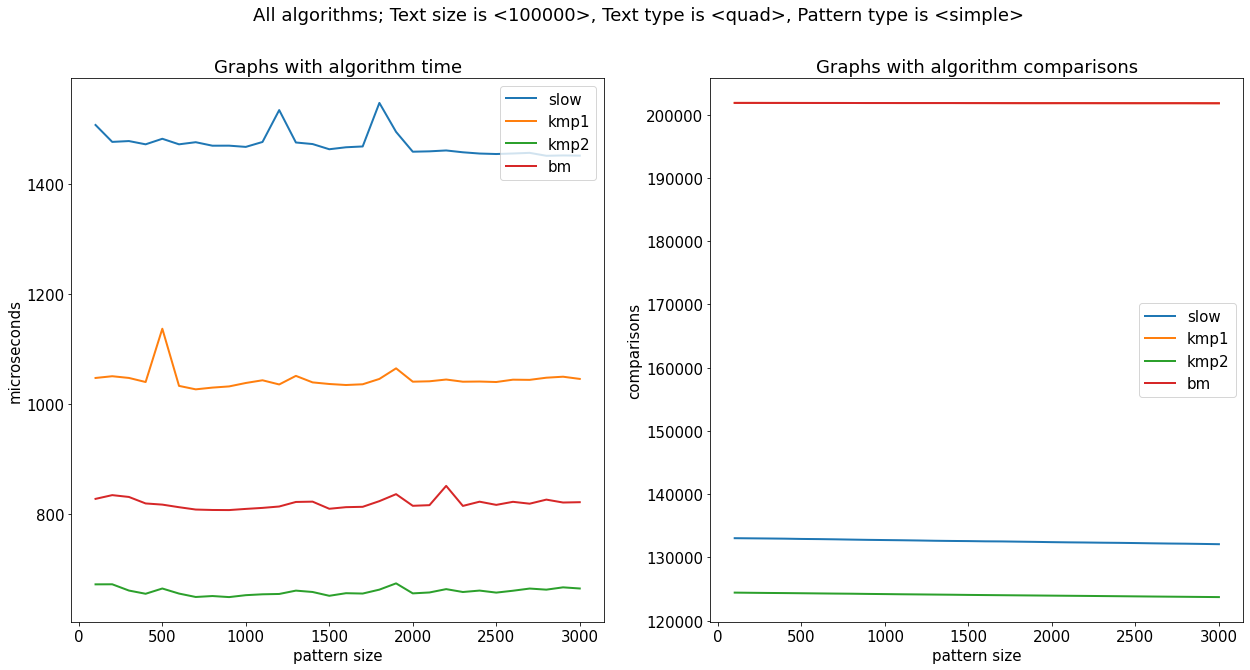

In [24]:
plotTestsTimeComps('100000', 'quad', 'simple')


##### Size - 10000; Text - Binary; Pattern - Advance


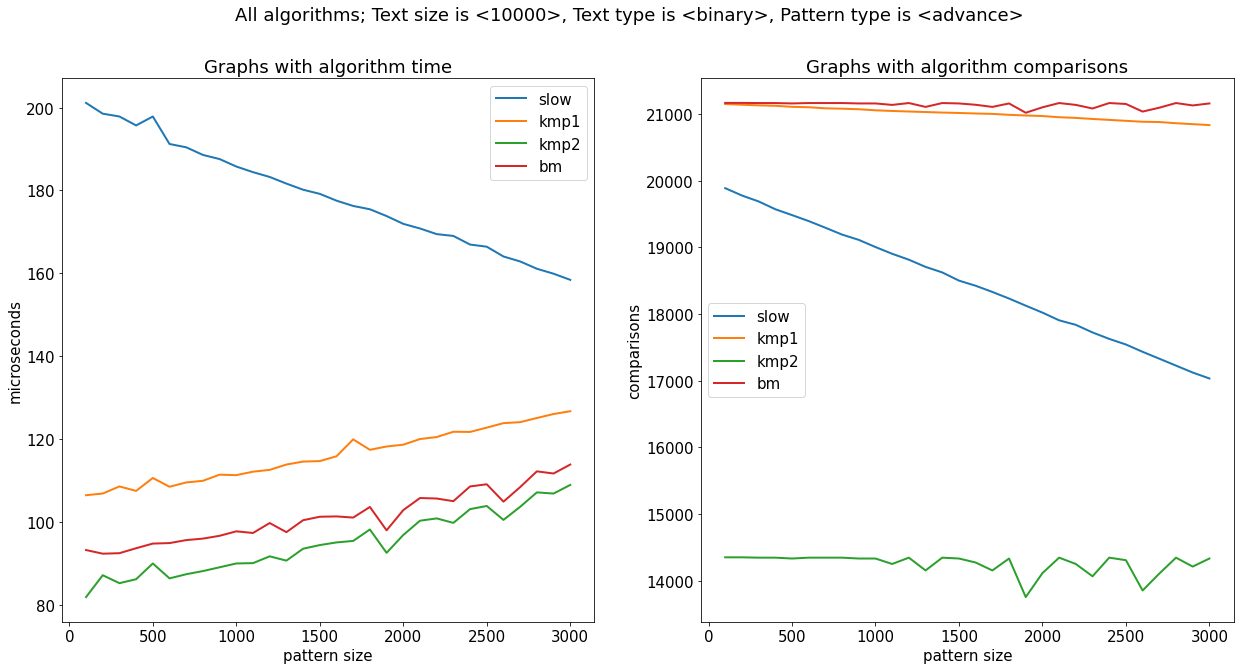

In [25]:
plotTestsTimeComps('10000', 'binary', 'advance')


##### Size - 10000; Text - Quad; Pattern - Advance


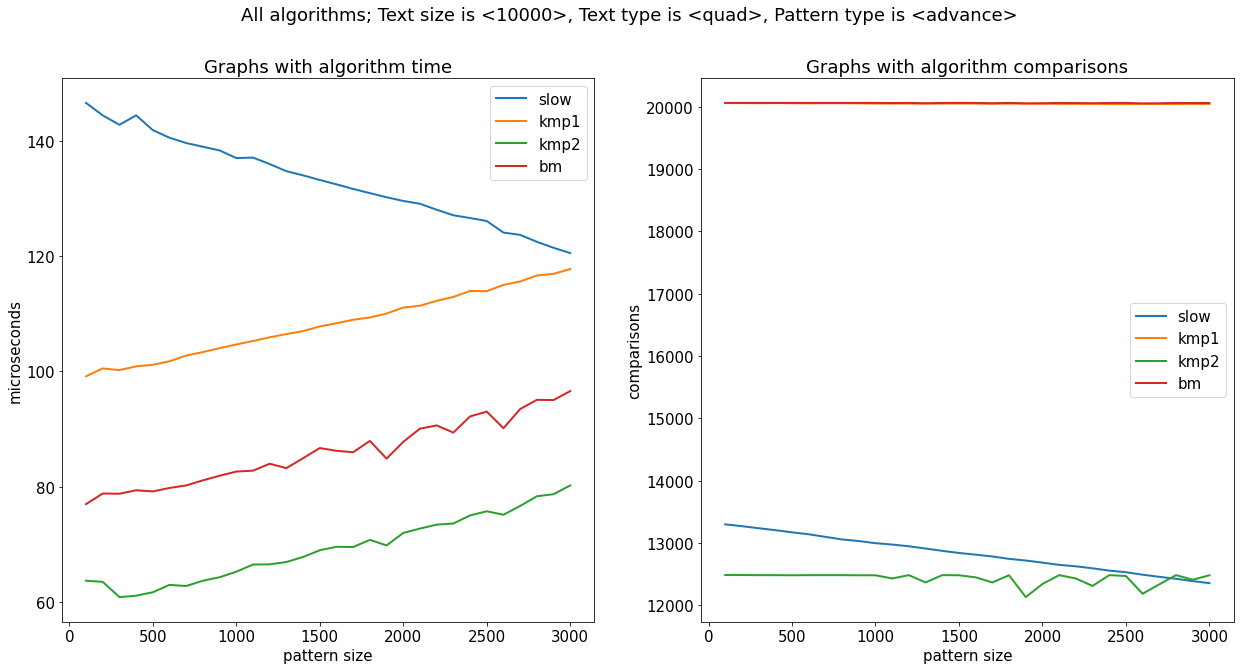

In [26]:
plotTestsTimeComps('10000', 'quad', 'advance')


##### Size - 100000; Text - Binary; Pattern - Advance


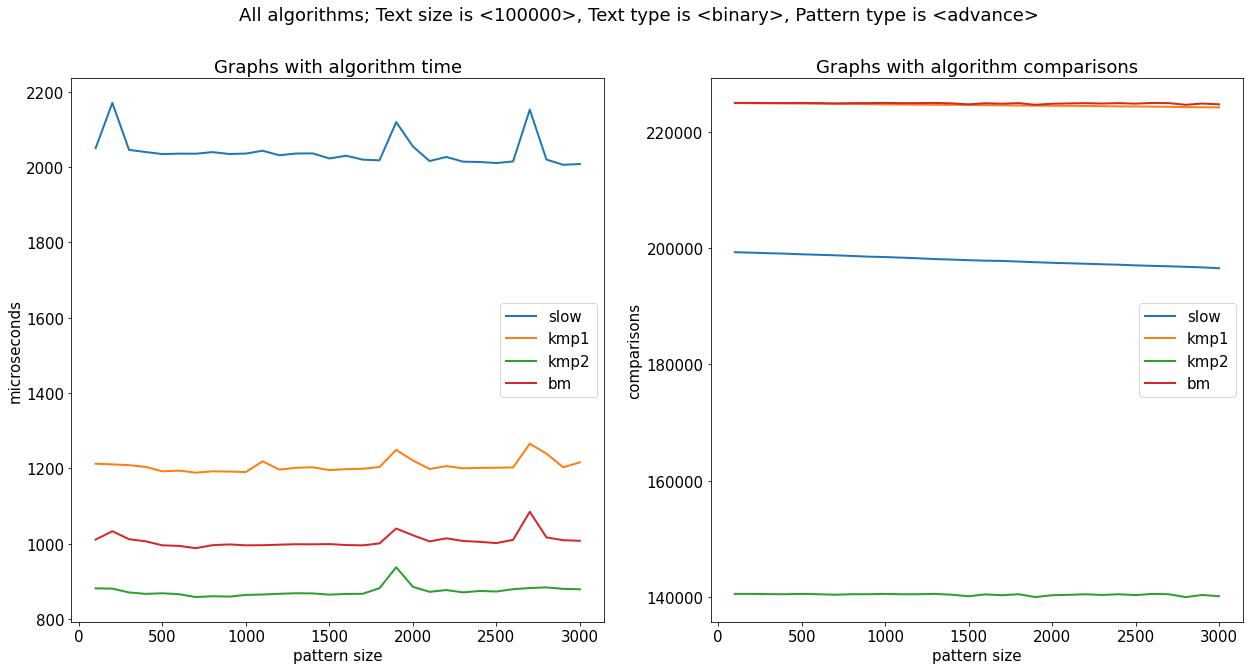

In [27]:
plotTestsTimeComps('100000', 'binary', 'advance')


##### Size - 100000; Text - Quad; Pattern - Advance


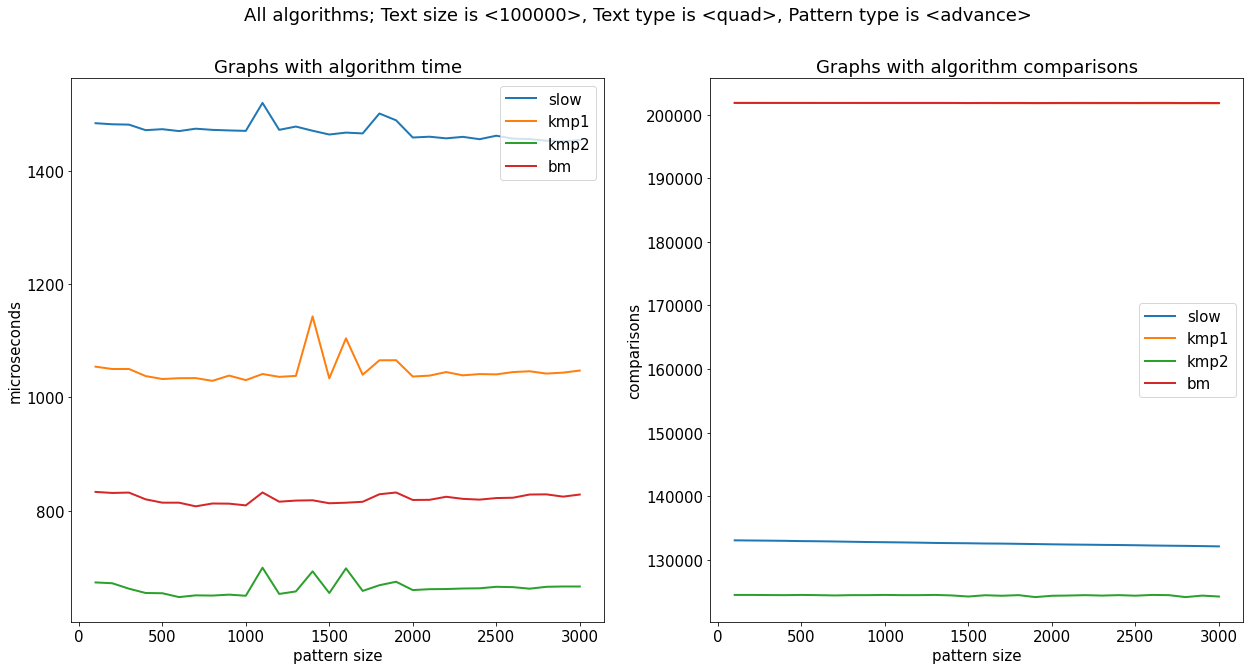

In [28]:
plotTestsTimeComps('100000', 'quad', 'advance')
